<a href="https://colab.research.google.com/github/bharathssa/Information_Management_Project702/blob/main/Prj_702_RQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

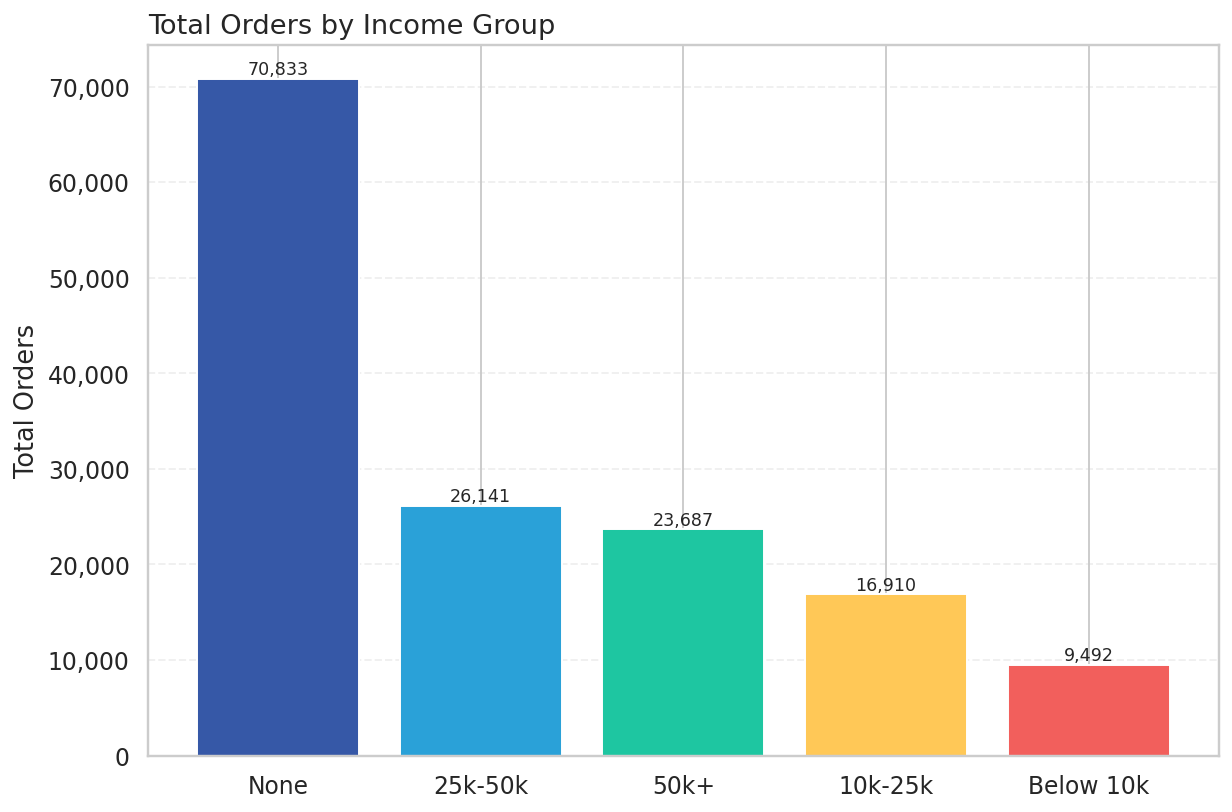


The "No Income" segment contributes the highest number of orders overall (≈70.8k), 
followed by mid-tier groups like 25k–50k and 50k+. Despite lower purchasing power, the large base 
of users in the “None” category drives high total activity.



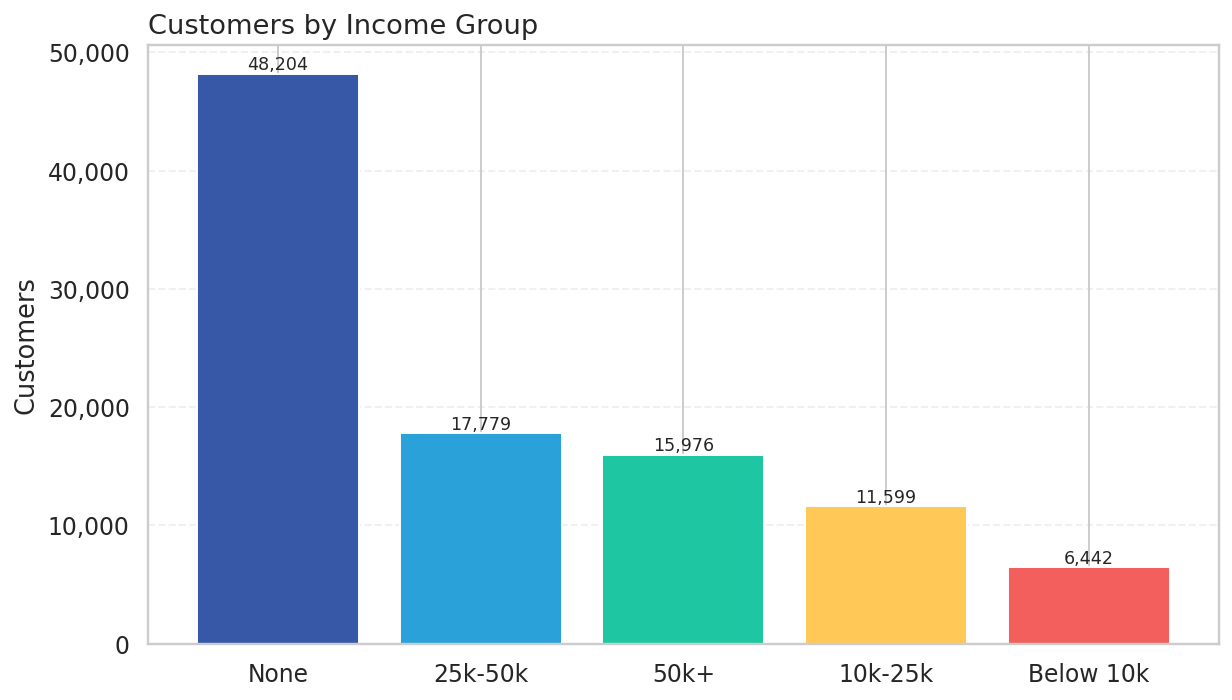


Customer Distribution by Income Group - Unsurprisingly, the "No Income" group also has the largest customer base (48k+), 
possibly representing students, homemakers, or retired individuals. Income groups like 50k+ and 25k–50k have a moderate 
but significant share of the customer population.



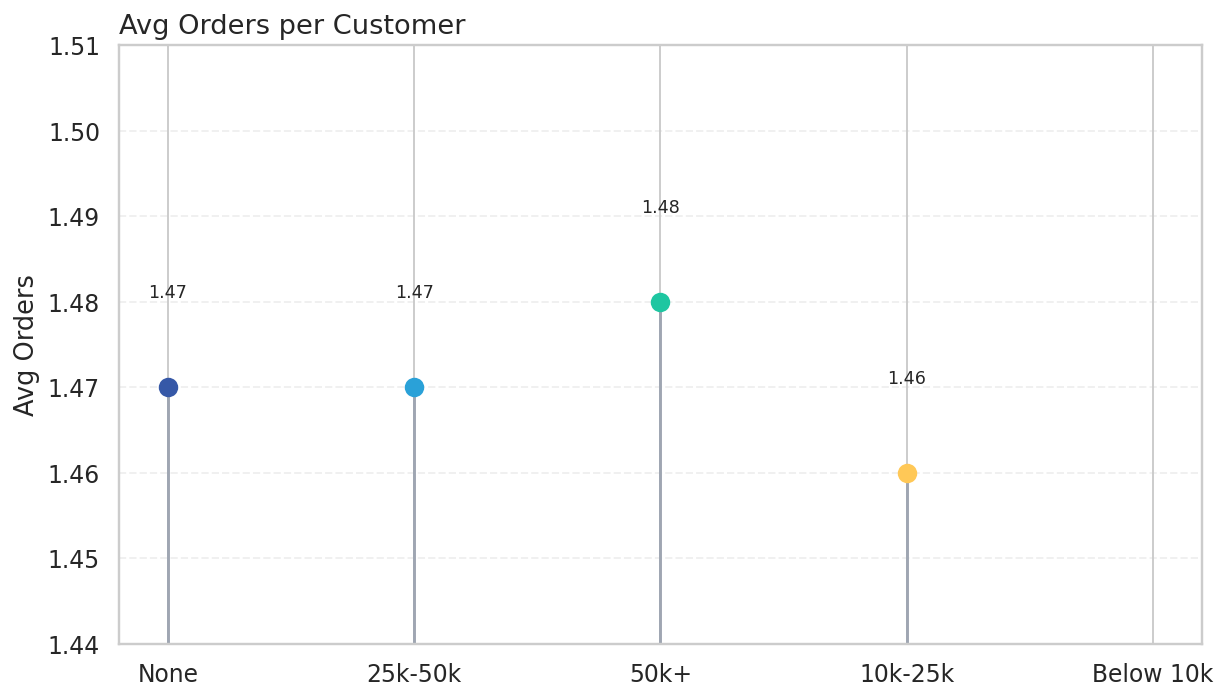


Average Orders per Customer - The "50k+" group stands out slightly with the highest average orders per user (1.48), 
indicating higher engagement or repeat usage. However, the differences across groups are marginal, ranging from 1.46 to 1.48, 
suggesting consistent ordering behavior regardless of income.



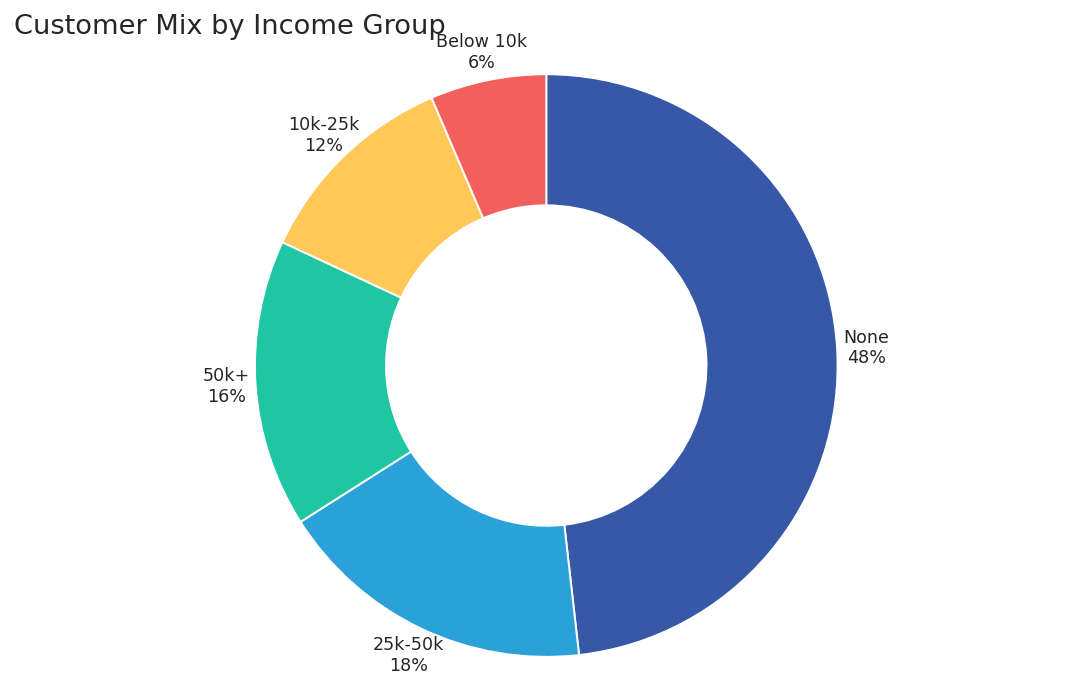


Customer Mix (Donut Chart) - The mix shows that nearly 40% of the total customer base belongs to 
the "No Income" group, making it a critical demographic for user retention and low-cost promotion strategies. 
Higher income groups represent smaller slices of the pie but potentially higher per-order value (to be validated with spending analysis).



In [17]:
# === Suppress Warnings ===
import warnings
warnings.filterwarnings('ignore')

# ======================================
# Step 1: Import Required Libraries
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ======================================
# Step 2: Manually Enter Data
# ======================================
data = [
    {"income_group": "None",       "customer_count": 48204, "total_orders": 70833, "avg_orders_per_customer": 1.47},
    {"income_group": "Below 10k",  "customer_count":  6442, "total_orders":  9492, "avg_orders_per_per_customer": 1.47},
    {"income_group": "10k-25k",    "customer_count": 11599, "total_orders": 16910, "avg_orders_per_customer": 1.46},
    {"income_group": "25k-50k",    "customer_count": 17779, "total_orders": 26141, "avg_orders_per_customer": 1.47},
    {"income_group": "50k+",       "customer_count": 15976, "total_orders": 23687, "avg_orders_per_customer": 1.48},
]
df = pd.DataFrame(data)
df = df.sort_values("customer_count", ascending=False).reset_index(drop=True)

# ======================================
# Step 3: Format Helpers
# ======================================
def intcomma(x, pos=None):
    return f"{int(x):,}"
fmt_int = FuncFormatter(intcomma)

# ======================================
# Step 4: Custom Color Palette
# ======================================
palette = ["#3658A7", "#2AA1D8", "#1EC6A1", "#FFC857", "#F25F5C"]
color_map = {g: c for g, c in zip(df["income_group"], palette)}

# ======================================
# Chart 1: Total Orders by Income Group
# ======================================
plt.figure(figsize=(9, 6), dpi=140)
bars = plt.bar(df["income_group"], df["total_orders"], color=[color_map[g] for g in df["income_group"]])
plt.title("Total Orders by Income Group", loc="left", fontsize=14)
plt.ylabel("Total Orders")
plt.gca().yaxis.set_major_formatter(fmt_int)
plt.grid(axis="y", linestyle="--", alpha=0.3)
for b in bars:
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y, f"{int(y):,}", ha="center", va="bottom", fontsize=9)


plt.tight_layout()
plt.show()

print('\nThe "No Income" segment contributes the highest number of orders overall (≈70.8k), \
\nfollowed by mid-tier groups like 25k–50k and 50k+. Despite lower purchasing power, the large base \
\nof users in the “None” category drives high total activity.\n')


# ======================================
# Chart 2: Customers by Income Group
# ======================================


plt.figure(figsize=(9, 5.2), dpi=140)
bars = plt.bar(df["income_group"], df["customer_count"], color=[color_map[g] for g in df["income_group"]])
plt.title("Customers by Income Group", loc="left", fontsize=14)
plt.ylabel("Customers")
plt.gca().yaxis.set_major_formatter(fmt_int)
plt.grid(axis="y", linestyle="--", alpha=0.3)
for b in bars:
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y, f"{int(y):,}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

print('\nCustomer Distribution by Income Group - Unsurprisingly, the "No Income" group also has the largest customer base (48k+), \
\npossibly representing students, homemakers, or retired individuals. Income groups like 50k+ and 25k–50k have a moderate \
\nbut significant share of the customer population.\n')

# ======================================
# Chart 3: Avg Orders per Customer (Lollipop)
# ======================================
x = np.arange(len(df))
y = df["avg_orders_per_customer"].values
plt.figure(figsize=(9, 5.2), dpi=140)
plt.stem(x, y, basefmt=" ", linefmt="#9FA6B2", markerfmt="o")
for xi, yi, g in zip(x, y, df["income_group"]):
    plt.plot(xi, yi, "o", markersize=9, color=color_map[g])
plt.xticks(x, df["income_group"])
plt.title("Avg Orders per Customer", loc="left", fontsize=14)
plt.ylabel("Avg Orders")
plt.ylim(min(y) - 0.02, max(y) + 0.03)
plt.grid(axis="y", linestyle="--", alpha=0.3)
for xi, yi in zip(x, y):
    plt.text(xi, yi + 0.01, f"{yi:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

print('\nAverage Orders per Customer - The "50k+" group stands out slightly with the highest average orders per user (1.48), \
\nindicating higher engagement or repeat usage. However, the differences across groups are marginal, ranging from 1.46 to 1.48, \
\nsuggesting consistent ordering behavior regardless of income.\n')

# ======================================
# Chart 4: Customer Mix (Donut Chart)
# ======================================
plt.figure(figsize=(8, 5.2), dpi=140)
vals = df["customer_count"].values
labels = df["income_group"].tolist()
colors = [color_map[g] for g in labels]
wedges, _ = plt.pie(
    vals,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.45, edgecolor="white")
)
total = vals.sum()
for w, label, v in zip(wedges, labels, vals):
    ang = (w.theta2 + w.theta1)/2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    plt.text(1.1*x, 1.1*y, f"{label}\n{v/total:.0%}", ha="center", va="center", fontsize=9)
plt.title("Customer Mix by Income Group", loc="left", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()

print('\nCustomer Mix (Donut Chart) - The mix shows that nearly 40% of the total customer base belongs to \
\nthe "No Income" group, making it a critical demographic for user retention and low-cost promotion strategies. \
\nHigher income groups represent smaller slices of the pie but potentially higher per-order value (to be validated with spending analysis).\n')

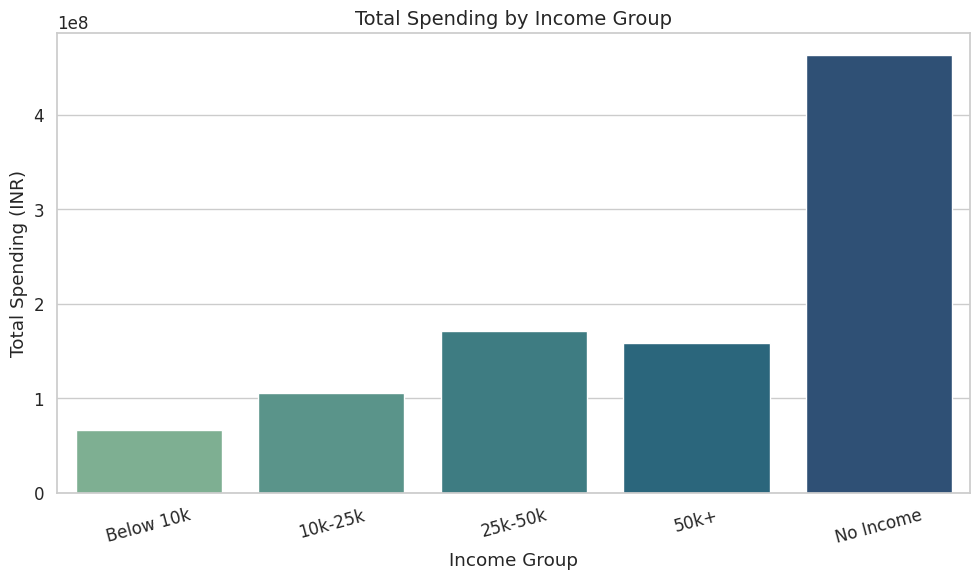


Total Spending by Income Group - Insight: Despite having "No Income", 
that segment shows the highest total spending, likely due to its very large customer base (48k+).



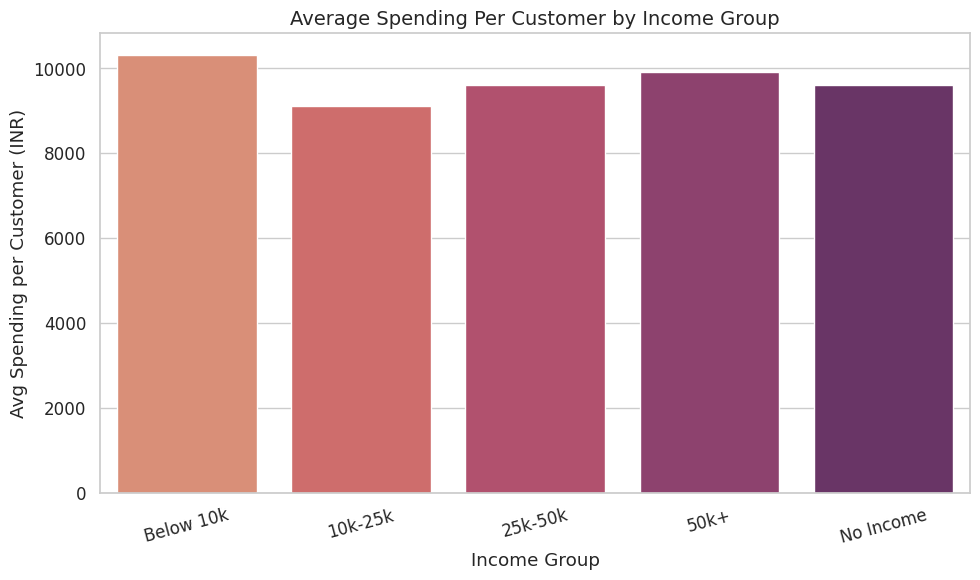


Average Spending per Customer - Insight: Interestingly, "Below 10k" customers spend the most per customer on average,
 even more than "50k+" group.



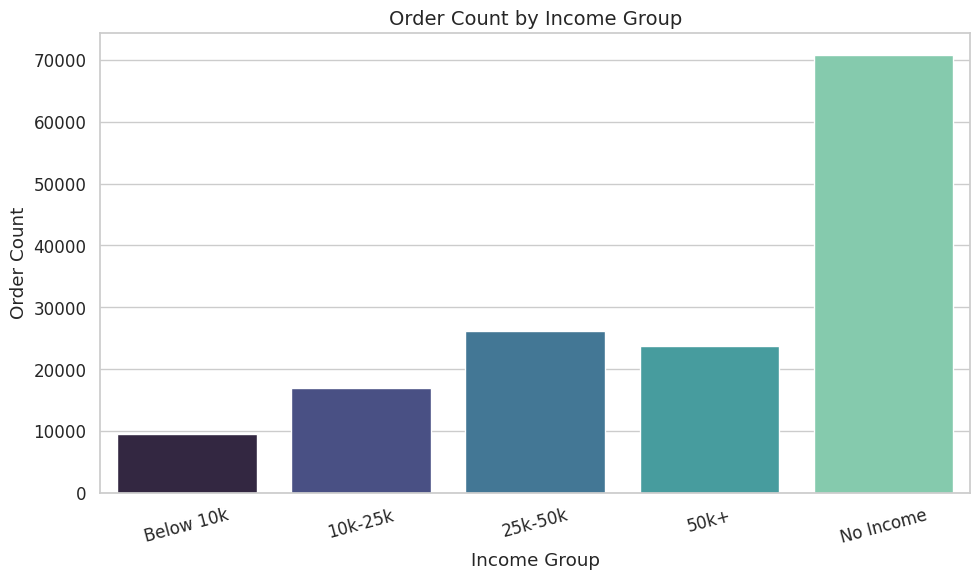


Order Count by Income Group - Insight: "No Income" group also placed the most number of orders, 
reinforcing its size and impact.



In [21]:
# === Suppress Warnings ===
import warnings
warnings.filterwarnings('ignore')


# === STEP 1: Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === STEP 2: Manually create the data (from your image) ===
data = {
    'income_group': ['Below 10k', '10k-25k', '25k-50k', '50k+', 'No Income'],
    'order_count': [9492, 16910, 26141, 23687, 70833],
    'total_spending': [66436998.0, 105542983.0, 170706789.0, 158217241.0, 463419766.0],
    'avg_spending_per_customer': [10313.1, 9099.32, 9601.6, 9903.43, 9613.72]
}

df = pd.DataFrame(data)

# === STEP 3: Set plot style ===
sns.set(style='whitegrid', palette='colorblind', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# === STEP 4: Total Spending by Income Group ===
plt.figure()
sns.barplot(data=df, x='income_group', y='total_spending', palette='crest')
plt.title('Total Spending by Income Group', fontsize=14)
plt.ylabel('Total Spending (INR)')
plt.xlabel('Income Group')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print('\nTotal Spending by Income Group - Insight: Despite having "No Income", \
\nthat segment shows the highest total spending, likely due to its very large customer base (48k+).\n')

# === STEP 5: Avg Spending Per Customer ===
plt.figure()
sns.barplot(data=df, x='income_group', y='avg_spending_per_customer', palette='flare')
plt.title('Average Spending Per Customer by Income Group', fontsize=14)
plt.ylabel('Avg Spending per Customer (INR)')
plt.xlabel('Income Group')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print('\nAverage Spending per Customer - Insight: Interestingly, "Below 10k" customers spend the most per customer on average,\
\n even more than "50k+" group.\n')

# === STEP 6: Order Count by Income Group ===
plt.figure()
sns.barplot(data=df, x='income_group', y='order_count', palette='mako')
plt.title('Order Count by Income Group', fontsize=14)
plt.ylabel('Order Count')
plt.xlabel('Income Group')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print('\nOrder Count by Income Group - Insight: "No Income" group also placed the most number of orders, \
\nreinforcing its size and impact.\n')


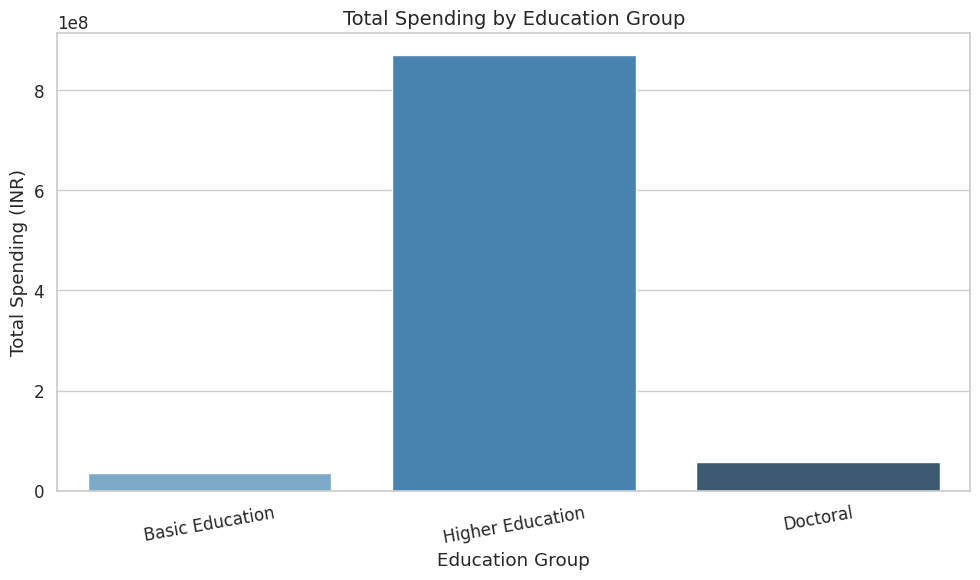


Insight 1: Customers with Higher Education contribute overwhelmingly to total spending, likely due to their large volume of orders. Basic Education customers spend the least in total.



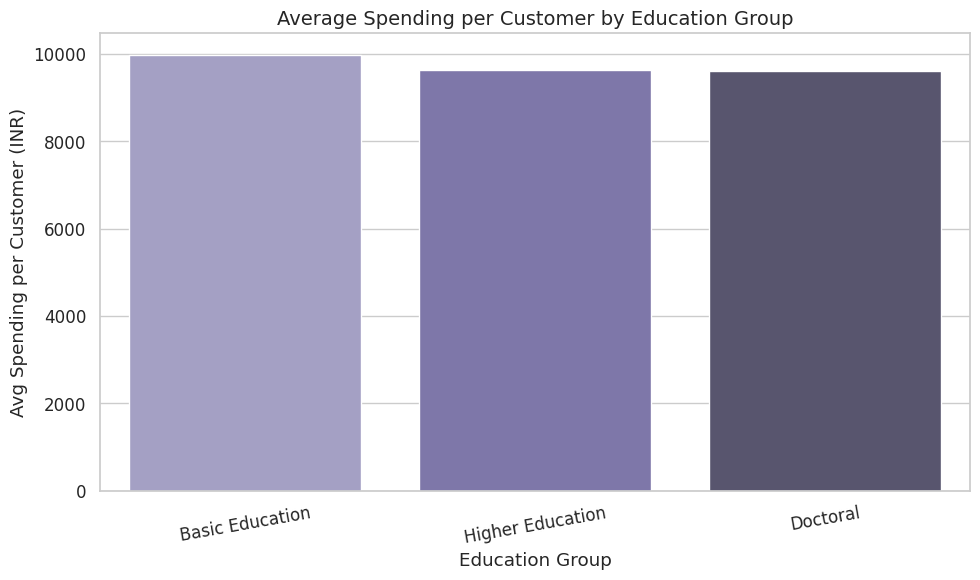


Insight 2: Despite their lower total orders, Basic Education customers have the **highest spending per person**, suggesting higher individual order values or loyal frequent buyers.



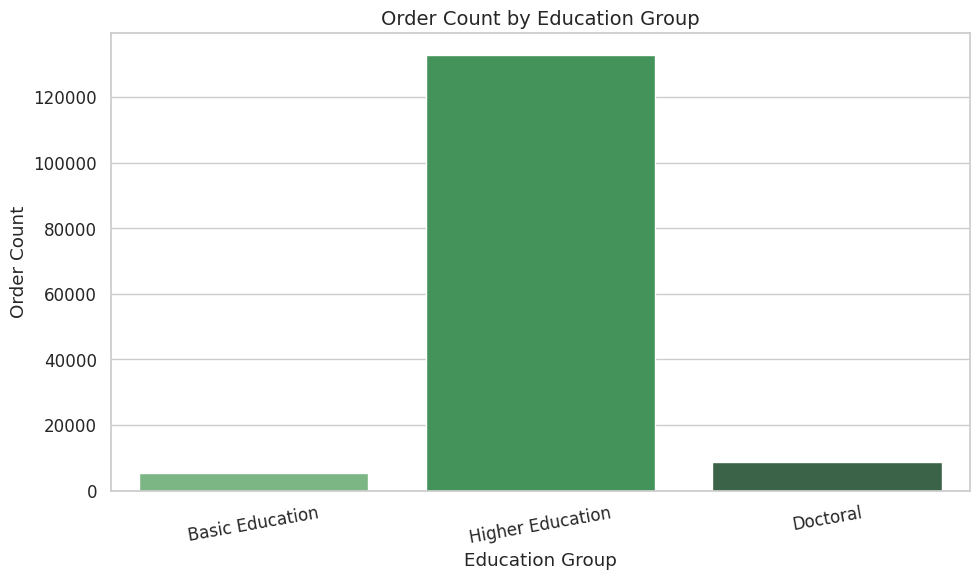


Insight 3: Higher Education customers dominate order volume by a large margin, indicating a key target group for volume-based offers or loyalty programs.



In [22]:
# === Suppress Warnings ===
import warnings
warnings.filterwarnings('ignore')

# === STEP 1: Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === STEP 2: Manually enter the data ===
data = {
    'education_group': ['Basic Education', 'Higher Education', 'Doctoral'],
    'order_count': [5355, 132881, 8827],
    'total_spending': [36027851.0, 871359918.0, 56936008.0],
    'avg_spending_per_customer': [9980.01, 9632.33, 9604.59]
}
df = pd.DataFrame(data)

# === STEP 3: Set plot style ===
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# === STEP 4: Total Spending by Education Group ===
plt.figure()
sns.barplot(data=df, x='education_group', y='total_spending', palette='Blues_d')
plt.title('Total Spending by Education Group', fontsize=14)
plt.ylabel('Total Spending (INR)')
plt.xlabel('Education Group')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

print('\nInsight 1: Customers with Higher Education contribute overwhelmingly to total spending, \
likely due to their large volume of orders. Basic Education customers spend the least in total.\n')

# === STEP 5: Average Spending Per Customer ===
plt.figure()
sns.barplot(data=df, x='education_group', y='avg_spending_per_customer', palette='Purples_d')
plt.title('Average Spending per Customer by Education Group', fontsize=14)
plt.ylabel('Avg Spending per Customer (INR)')
plt.xlabel('Education Group')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

print('\nInsight 2: Despite their lower total orders, Basic Education customers have the **highest spending per person**, \
suggesting higher individual order values or loyal frequent buyers.\n')

# === STEP 6: Order Count by Education Group ===
plt.figure()
sns.barplot(data=df, x='education_group', y='order_count', palette='Greens_d')
plt.title('Order Count by Education Group', fontsize=14)
plt.ylabel('Order Count')
plt.xlabel('Education Group')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

print('\nInsight 3: Higher Education customers dominate order volume by a large margin, \
indicating a key target group for volume-based offers or loyalty programs.\n')


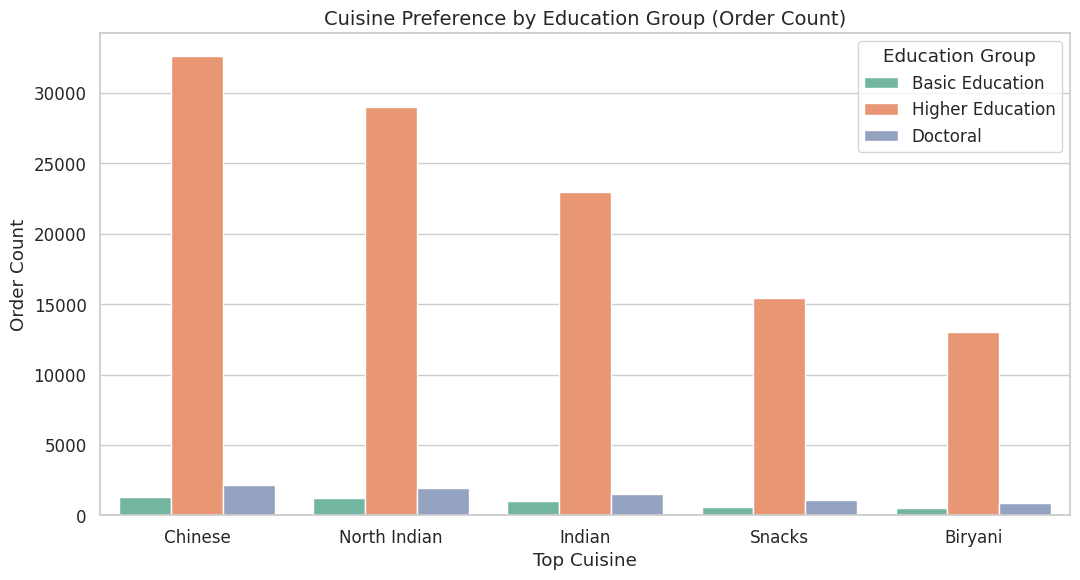


Insight 1: Across all education levels, Chinese and North Indian cuisines are most preferred. Higher Education customers show significantly greater volume overall, especially for Chinese.



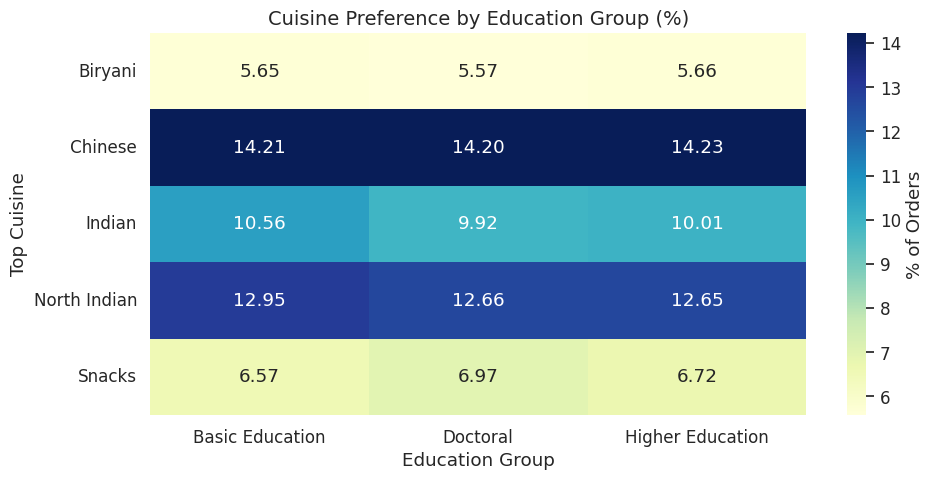


Insight 2: While absolute counts differ, **Chinese cuisine consistently ranks highest across all groups by percentage**. Doctoral customers show a similar proportional preference as Basic and Higher Education groups.



In [23]:
# === STEP 1: Import Libraries ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === STEP 2: Define Data (from your screenshot) ===
data = {
    'education_group': ['Basic Education']*5 + ['Higher Education']*5 + ['Doctoral']*5,
    'top_cuisine': ['Chinese', 'North Indian', 'Indian', 'Snacks', 'Biryani'] * 3,
    'order_count': [
        1316, 1199, 978, 608, 523,
        32642, 29023, 22956, 15405, 12989,
        2174, 1938, 1518, 1066, 853
    ],
    'percentage': [
        14.21, 12.95, 10.56, 6.57, 5.65,
        14.23, 12.65, 10.01, 6.72, 5.66,
        14.2, 12.66, 9.92, 6.97, 5.57
    ]
}
df = pd.DataFrame(data)

# === STEP 3: Grouped Bar Plot — Order Count by Cuisine and Education ===
sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(11, 6))
sns.barplot(
    data=df,
    x='top_cuisine',
    y='order_count',
    hue='education_group',
    palette='Set2'
)
plt.title("Cuisine Preference by Education Group (Order Count)", fontsize=14)
plt.xlabel("Top Cuisine")
plt.ylabel("Order Count")
plt.legend(title='Education Group')
plt.tight_layout()
plt.show()

print("\nInsight 1: Across all education levels, Chinese and North Indian cuisines are most preferred. \
Higher Education customers show significantly greater volume overall, especially for Chinese.\n")

# === STEP 4: Heatmap — Percentage Distribution ===
pivot_df = df.pivot(index='top_cuisine', columns='education_group', values='percentage')

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': '% of Orders'})
plt.title("Cuisine Preference by Education Group (%)", fontsize=14)
plt.xlabel("Education Group")
plt.ylabel("Top Cuisine")
plt.tight_layout()
plt.show()

print("\nInsight 2: While absolute counts differ, **Chinese cuisine consistently ranks highest across all groups by percentage**. \
Doctoral customers show a similar proportional preference as Basic and Higher Education groups.\n")
